In [150]:
from skimage import data, segmentation, graph, color
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

In [151]:
def plot_images(imgs, labels=None):
    num = len(imgs)
    ax = np.ceil(np.sqrt(num)).astype(int)
    ay = np.rint(np.sqrt(num)).astype(int)
    fig = plt.figure()
    for i in range(1, num+1):
        sub = fig.add_subplot(ax,ay,i)
        if labels is None:
            sub.set_title(f'{i}')
        else:
            sub.set_title(f'{labels[i-1]}')
        sub.axis('off')
        sub.imshow(imgs[i-1])
    plt.tight_layout()

In [155]:
# Create img and labels
mnist = datasets.MNIST('data', train=True, download=True)
img = np.asarray(mnist[2][0])

labels = np.copy(img)
labels[labels>0] = 1



labels1 = segmentation.slic(img, compactness=30, n_segments=28*28, # n_segments refers to things which are compared to other things..
                            start_label=0, channel_axis=None)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')

W = nx.to_numpy_array(graph.rag_mean_color(img, labels1, mode='similarity')) # scikit-image does this in a sparse way

# symmetric = np.allclose(W, W.T, atol=1e-10)
# print(symmetric)
# to make symmetric: array = 0.5 * (array + array.T)

d = W.sum(axis=0)
D = np.diag(d) # matrix with d on the diagonal

True


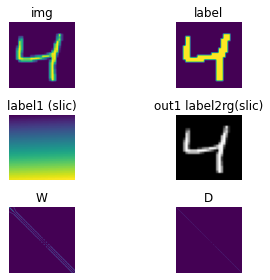

In [153]:
plot_images([img, labels, labels1, out1, W, D], ['img', 'label', 'label1 (slic)', 'out1 label2rg(slic)', 'W', 'D'])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

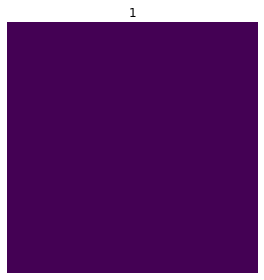

In [154]:
rag = graph.rag_mean_color(img, labels, mode='similarity')
new_labels = graph.cut_normalized(labels, rag)
print(new_labels)
plot_images([new_labels])